## Bank Marketing

### Problem Statment

The data set is based off the direct marketing campaigns of a  banking institution. These marketing campaigns were based on phone calls. More than one contact to a client was required, in order to know if the product (bank term deposit) was subscribed by a client or not. 

**The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).**

The dataset contains 21 columns including the output (y). I am going to discard the output column and use the remaining columns to find the most relatable independent variables (x) that will be able to predict if a customer will subscribe to a bank deposit or not.

### Project Approach

- Data exploration

- Feature engineering

- Building training/validation/test samples

- Model selection

- Model evaluation

### Project Definition

The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.groupby("y").size()

y
no     36548
yes     4640
dtype: int64

- I created a column called OUTPUT_LABEL which is going to represent 0 for the negative class and 1 for the positive class based on the bank marketing data set.

In [6]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT_LABEL
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [8]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT_LABEL
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0


In [9]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [10]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values)) ## 11.3 

prevalence of the positive class: 0.113


In [11]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [12]:
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT_LABEL
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
print('Number of columns:',len(df.columns))

Number of columns: 22


In [15]:
# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

- We are discarding duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [16]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT_LABEL
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


# Data Visualization

### Numerical Features

In [17]:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']

In [18]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

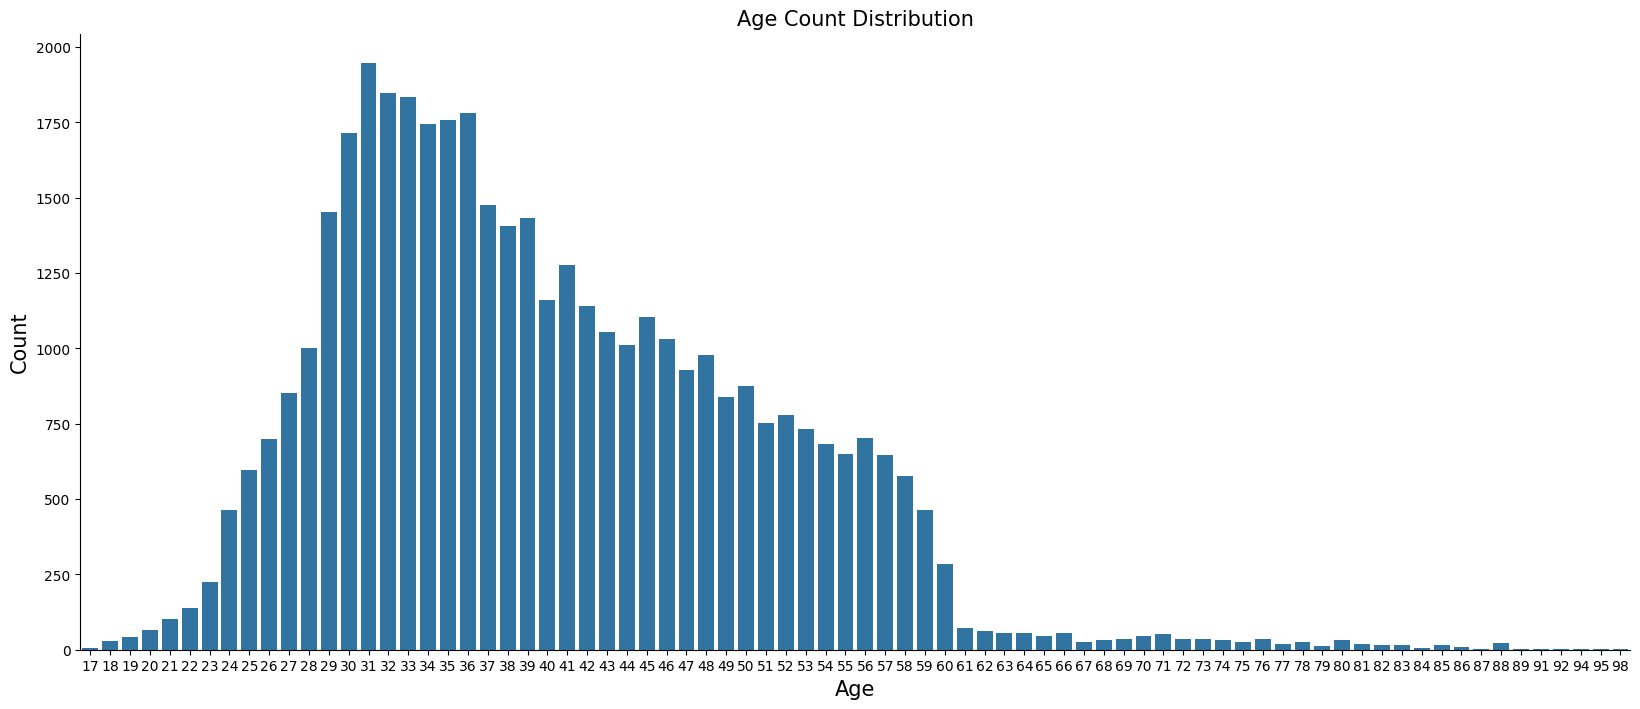

In [20]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

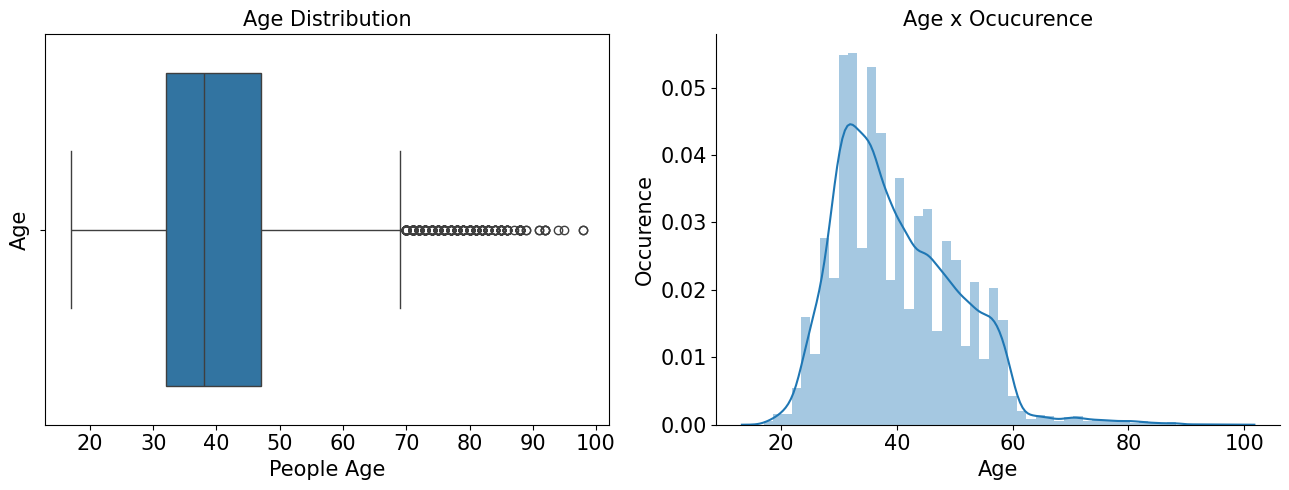

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

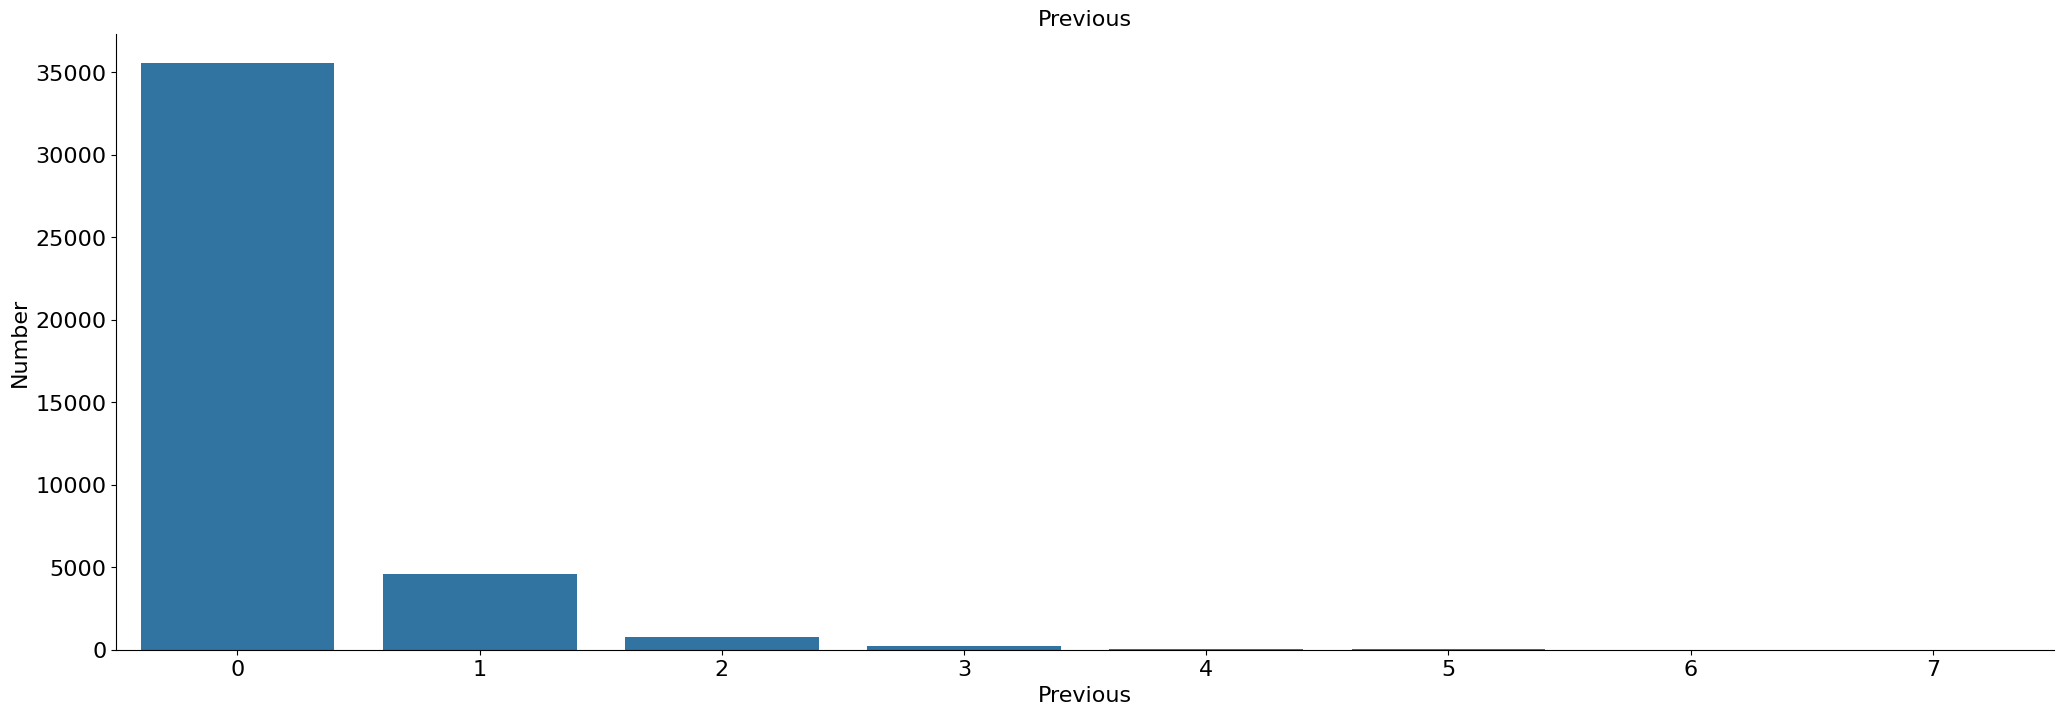

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

# previous: number of contacts performed before this campaign and for this client (numeric)

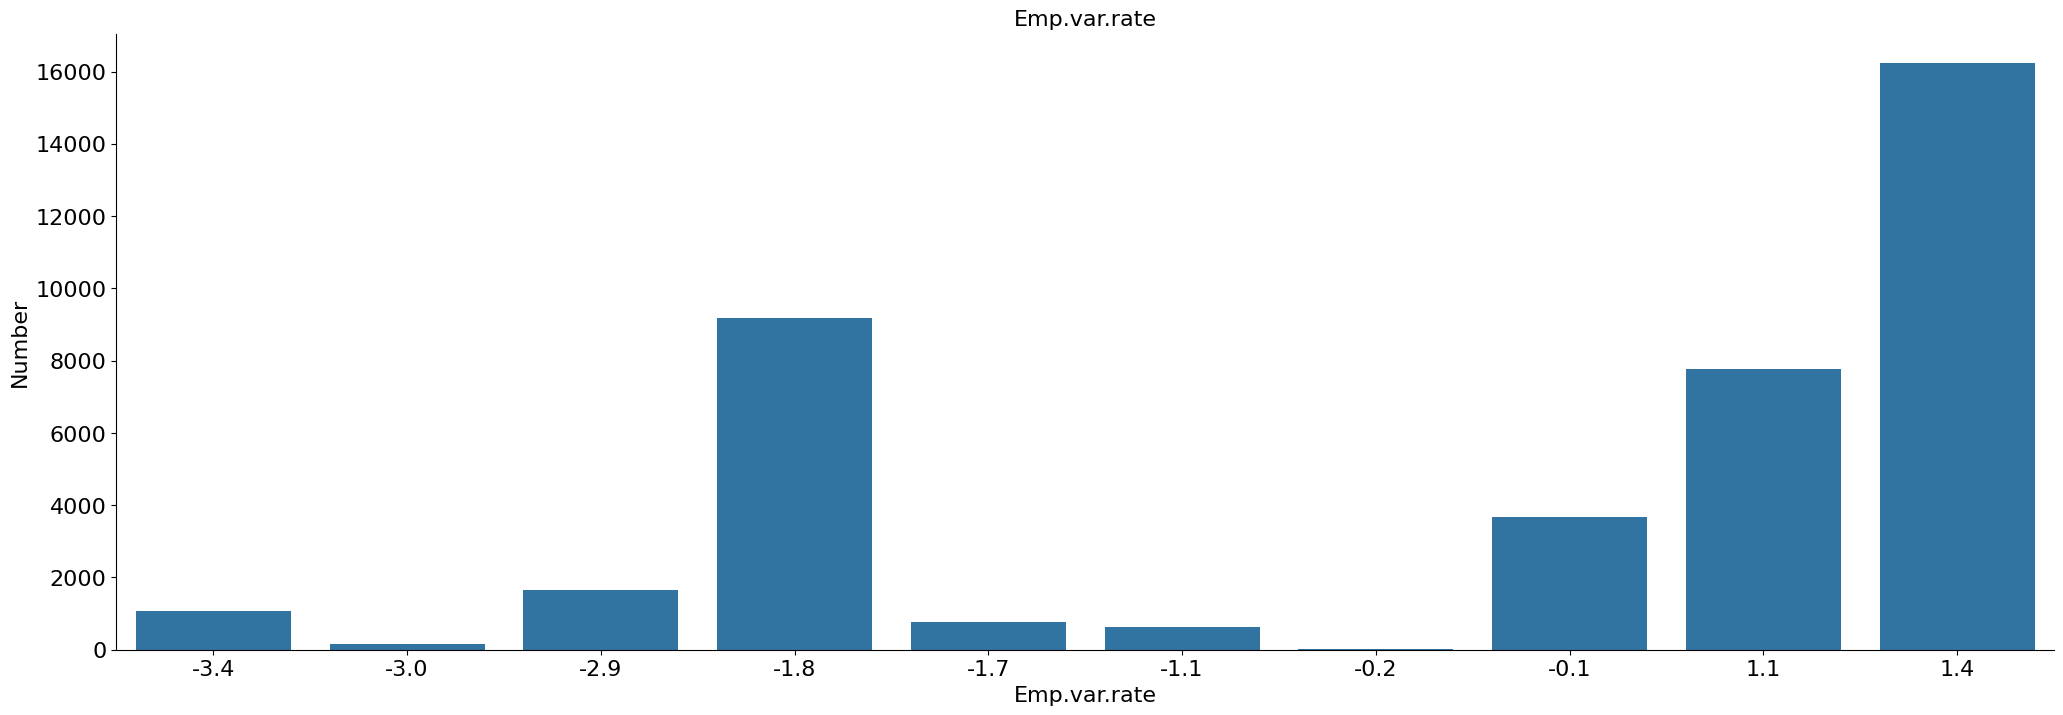

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'emp.var.rate', data = df[cols_num])
ax.set_xlabel('Emp.var.rate', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Emp.var.rate', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

# #emp.var.rate: employment variation rate - quarterly indicator (numeric)

In [24]:
df[cols_num].isnull().sum()

campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
age               0
euribor3m         0
dtype: int64

### Categorical Features

In [25]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

In [26]:
df[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

## One Hot Encoding

In [27]:
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


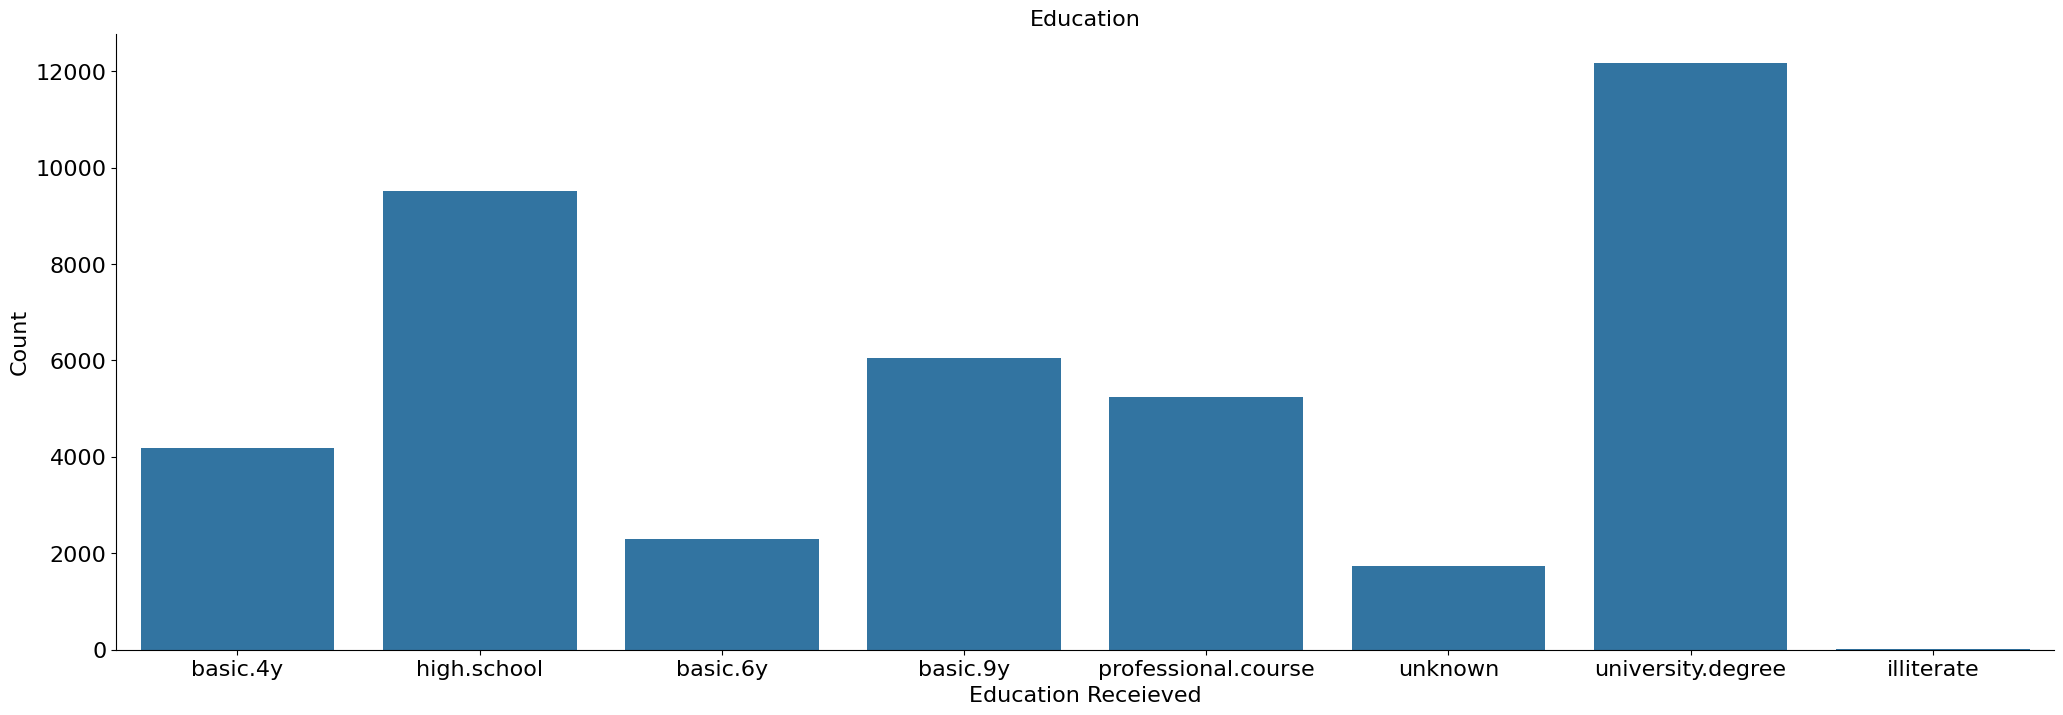

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

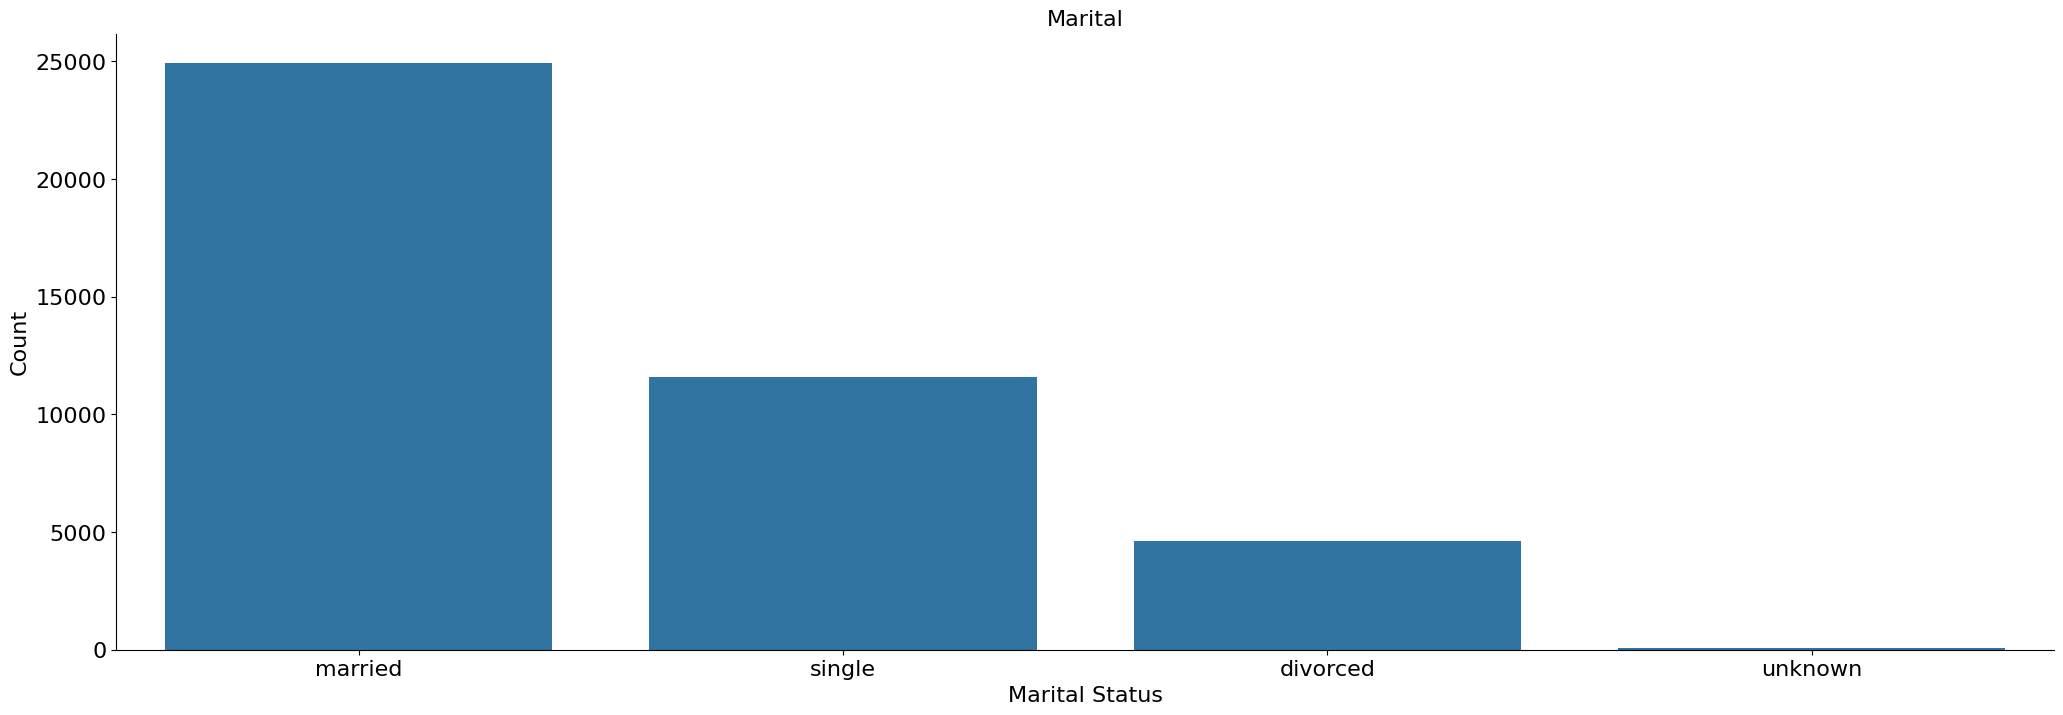

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

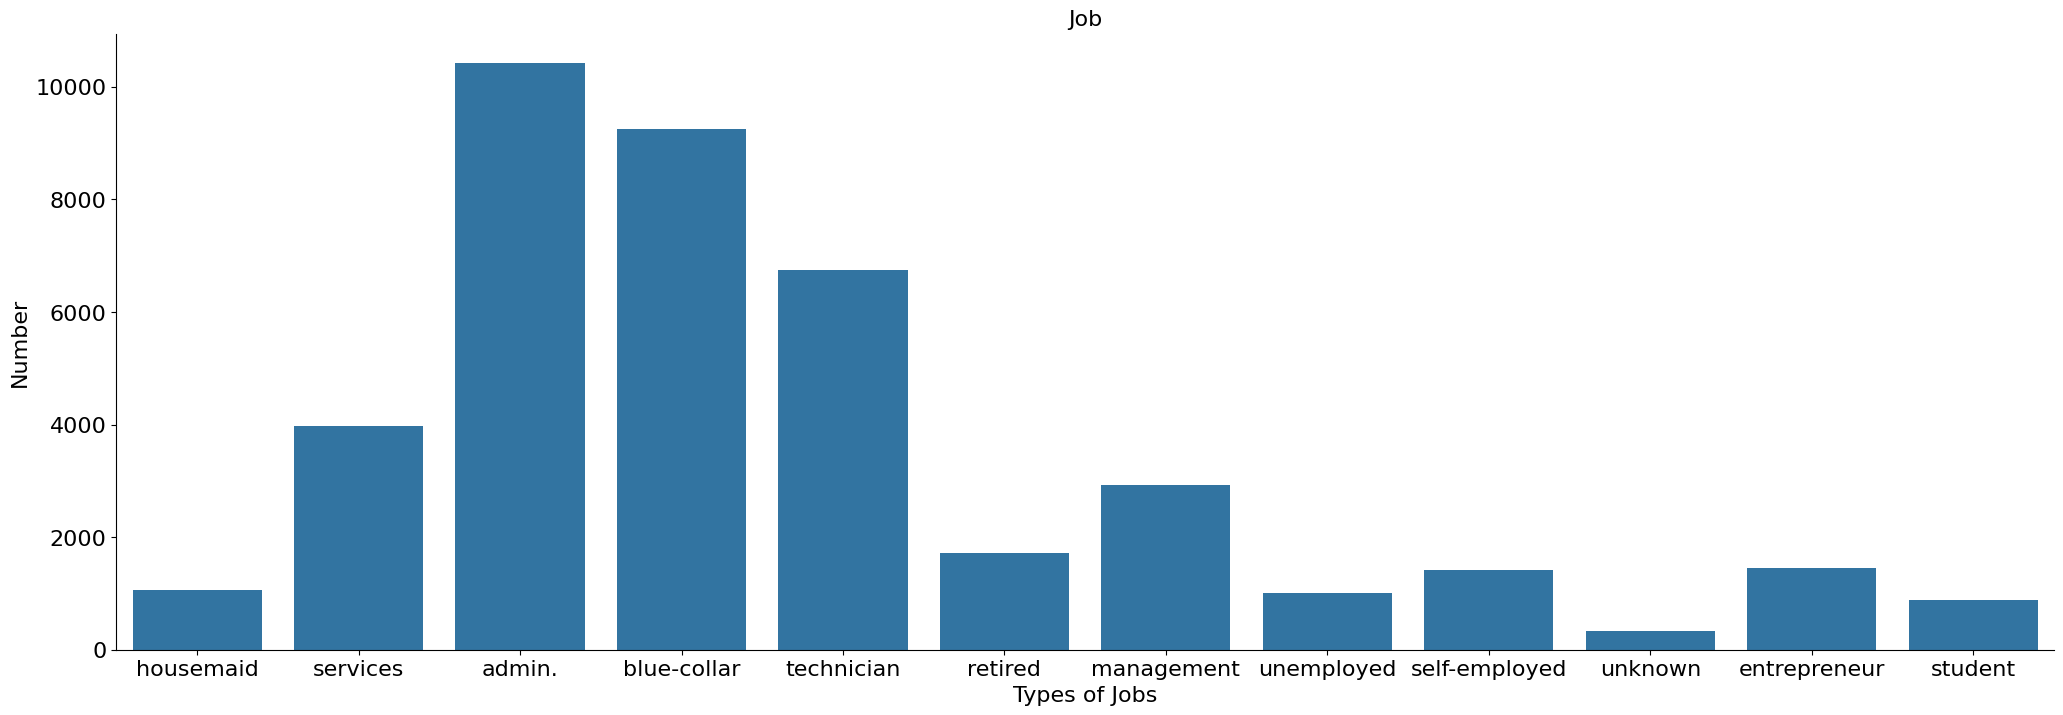

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

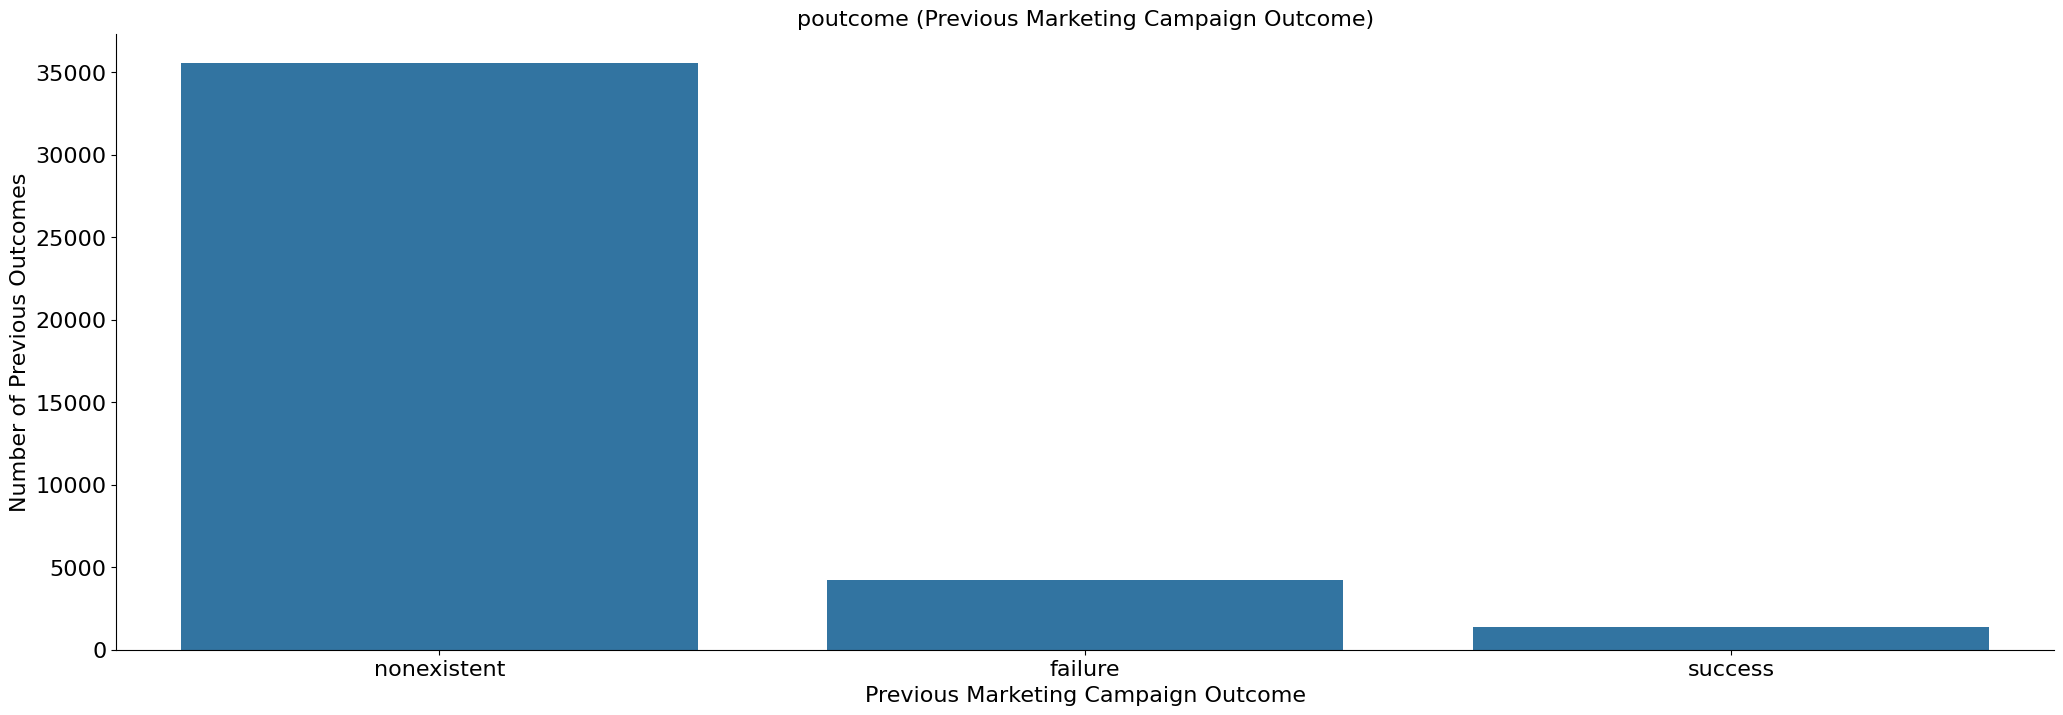

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

# 10 leades -> 2 lead conversion, 7 feailre, 1 not existiance 

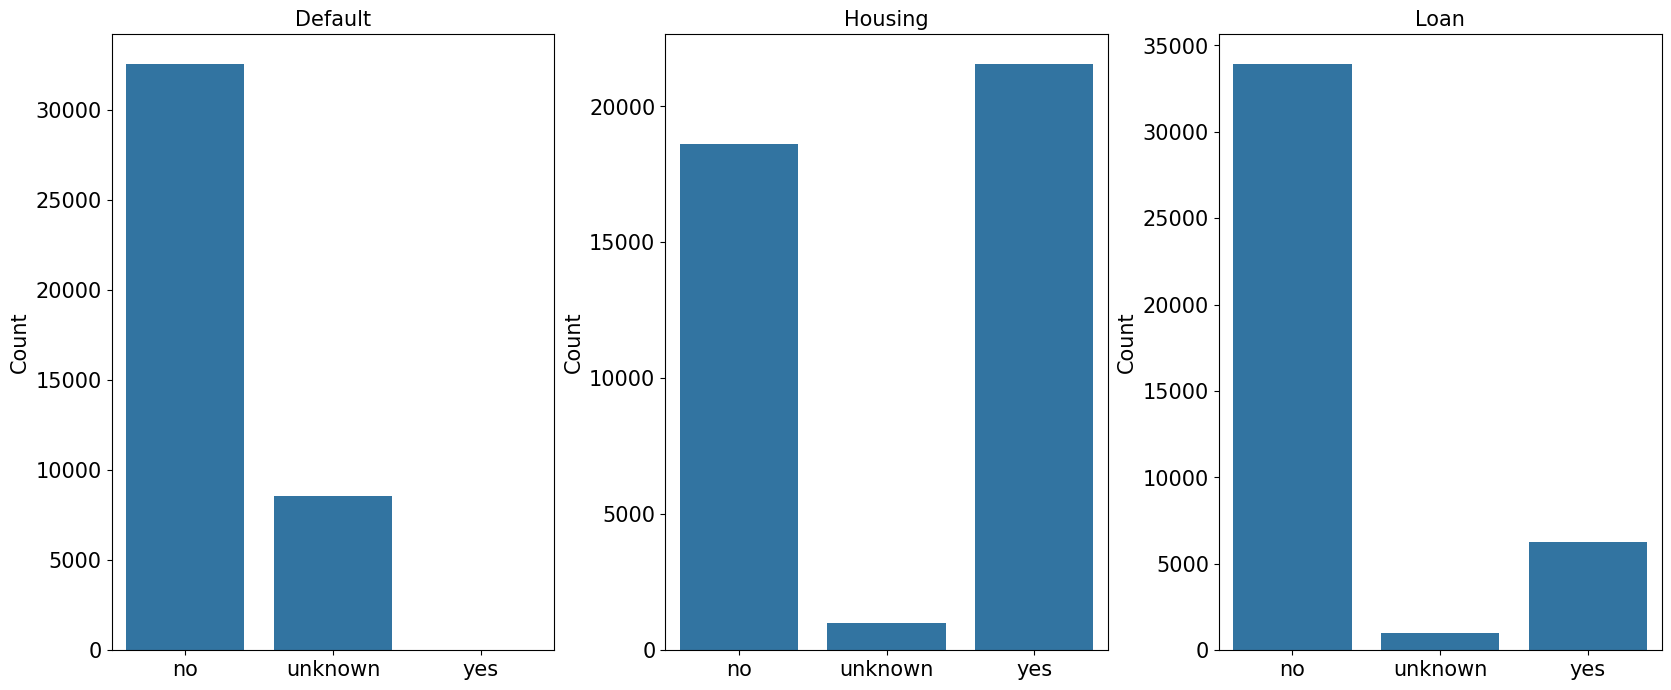

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

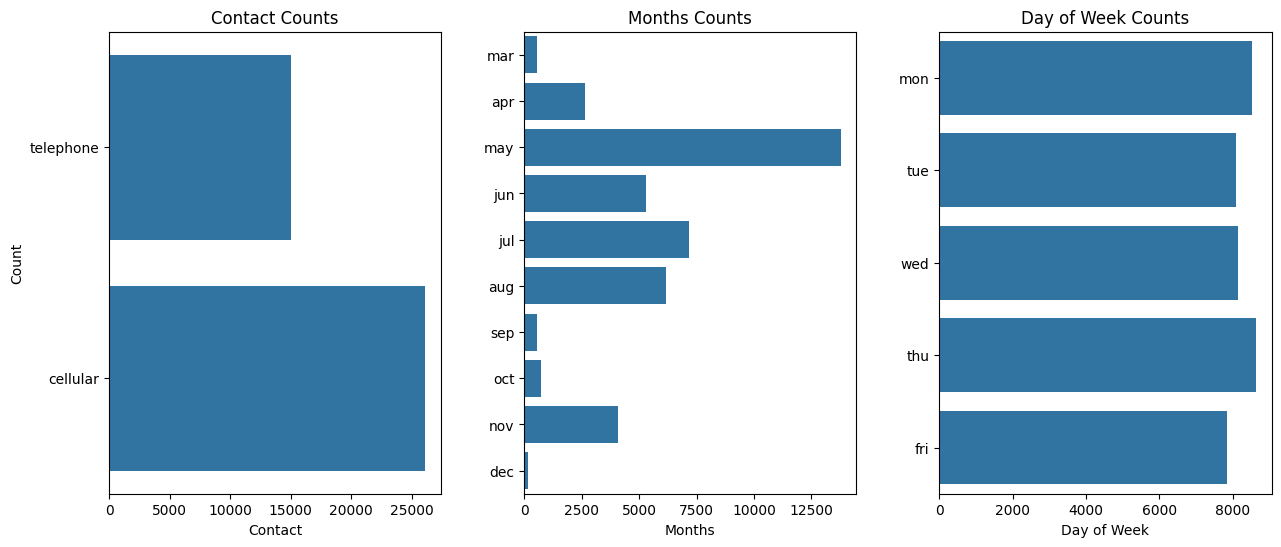

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)


In [34]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [35]:
cols_all_cat=list(cols_new_cat.columns)

In [36]:
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [37]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 62
Numerical Features: 9
Categorical Features: 53


In [38]:
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

campaign                 0
month_dec                0
default_no               0
default_unknown          0
default_yes              0
                        ..
education_basic.4y       0
education_basic.6y       0
education_basic.9y       0
education_high.school    0
poutcome_success         0
Length: 62, dtype: int64

In [39]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [40]:
df_data

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,999,0,-1.1,94.767,-50.8,4963.6,73,1.028,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,1
41184,1,999,0,-1.1,94.767,-50.8,4963.6,46,1.028,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,0
41185,2,999,0,-1.1,94.767,-50.8,4963.6,56,1.028,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,0
41186,1,999

In [41]:
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [42]:
len(cols_input)

62

In [43]:
df_data.head(6)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0
5,1,999,0,1.1,93.994,-36.4,5191.0,45,4.857,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0


# Building Training, Validation and test samples

In [44]:
# 100 dataset > 70 training and 30 validation & Testing ( 15 for validation and 15 for testing )

#shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [45]:
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [46]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42) # 30% ( 15% validation and 15% for the sample stest )
df_valid = df_valid_test.drop(df_test.index)

In [47]:
print(df_test.shape)

(6178, 63)


In [48]:
print(df_valid.shape)

(6178, 63)


In [49]:
#use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [50]:
print(df_train_all.shape)

(28832, 63)


In [51]:
28832 + 6178 + 6178

41188

In [52]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 6178):0.114
Valid prevalence(n = 6178):0.113
Train all prevalence(n = 28832):0.112


In [53]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 6472):0.500


In [54]:
df.groupby("y").size()

y
no     36548
yes     4640
dtype: int64

In [55]:
# split the validation into positive and negative
rows_pos = df_valid.OUTPUT_LABEL == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Valid balanced prevalence(n = 1398):0.500


In [56]:
# split the test into positive and negative
rows_pos = df_test.OUTPUT_LABEL == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Test balanced prevalence(n = 1410):0.500


In [57]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [58]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [59]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [60]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [61]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,campaign,2.552442
2,pdays,962.352456
3,previous,0.173037
4,emp.var.rate,0.078278


In [62]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [63]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (28832, 62)
Training shapes: (6472, 62) (6472,)
Validation shapes: (1398, 62) (1398,)


In [64]:
X_train_all

array([[1, 999, 1, ..., True, False, False],
       [1, 999, 1, ..., True, False, False],
       [4, 999, 0, ..., False, True, False],
       ...,
       [1, 4, 1, ..., False, False, True],
       [2, 999, 0, ..., False, True, False],
       [2, 999, 0, ..., False, True, False]], dtype=object)

In [65]:
X_train

array([[7, 999, 0, ..., False, True, False],
       [1, 999, 0, ..., False, True, False],
       [1, 999, 0, ..., False, True, False],
       ...,
       [3, 999, 0, ..., False, True, False],
       [3, 999, 1, ..., True, False, False],
       [1, 999, 1, ..., True, False, False]], dtype=object)

In [66]:
X_valid

array([[1, 999, 0, ..., False, True, False],
       [2, 999, 1, ..., True, False, False],
       [1, 999, 0, ..., False, True, False],
       ...,
       [1, 999, 0, ..., False, True, False],
       [2, 999, 0, ..., False, True, False],
       [2, 999, 0, ..., False, True, False]], dtype=object)

In [67]:
from sklearn.preprocessing import StandardScaler


In [68]:
scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [69]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [70]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [71]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [72]:
X_train_tf

array([[ 1.6201098 ,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [-0.56550716,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [-0.56550716,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       ...,
       [ 0.16303182,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [ 0.16303182,  0.19574704,  1.66625619, ...,  2.95310619,
        -2.51610627, -0.1862875 ],
       [-0.56550716,  0.19574704,  1.66625619, ...,  2.95310619,
        -2.51610627, -0.1862875 ]])

In [73]:
X_valid_tf

array([[-0.56550716,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [-0.20123767,  0.19574704,  1.66625619, ...,  2.95310619,
        -2.51610627, -0.1862875 ],
       [-0.56550716,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       ...,
       [-0.56550716,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [-0.20123767,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [-0.20123767,  0.19574704, -0.34865378, ..., -0.3386265 ,
         0.39743949, -0.1862875 ]])

# Model Selection

In [74]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

In [75]:
thresh = 0.5

In [78]:
## KKN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)


KNeighborsClassifier(n_neighbors=100)

In [79]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

In [80]:

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity, knn_train_f1 = print_report(y_train,y_train_preds, thresh)


print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity, knn_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.797
accuracy:0.734
recall:0.604
precision:0.817
specificity:0.858
prevalence:0.500
f1:0.694
 
Validation:
AUC:0.779
accuracy:0.741
recall:0.601
precision:0.835
specificity:0.878
prevalence:0.500
f1:0.699
 


In [81]:
# Logisitc Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [82]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity, lr_train_f1= print_report(y_train,y_train_preds, thresh)

print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity, lr_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.797
accuracy:0.744
recall:0.633
precision:0.815
specificity:0.856
prevalence:0.500
f1:0.712
 
Validation:
AUC:0.798
accuracy:0.747
recall:0.632
precision:0.822
specificity:0.863
prevalence:0.500
f1:0.715
 


In [83]:
# SGD

from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [84]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity, sgdc_train_f1 =print_report(y_train,y_train_preds, thresh)

print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity, sgdc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.792
accuracy:0.737
recall:0.646
precision:0.789
specificity:0.827
prevalence:0.500
f1:0.710
 
Validation:
AUC:0.800
accuracy:0.749
recall:0.648
precision:0.812
specificity:0.850
prevalence:0.500
f1:0.721
 


In [85]:
# navie bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [86]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')

nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity, nb_train_f1 =print_report(y_train,y_train_preds, thresh)


print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity, nb_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.771
accuracy:0.693
recall:0.492
precision:0.822
specificity:0.893
prevalence:0.500
f1:0.615
 
Validation:
AUC:0.780
accuracy:0.702
recall:0.496
precision:0.844
specificity:0.908
prevalence:0.500
f1:0.625
 


In [87]:
# DT

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [88]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity, tree_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity, tree_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.864
accuracy:0.784
recall:0.668
precision:0.871
specificity:0.899
prevalence:0.500
f1:0.756
 
Validation:
AUC:0.748
accuracy:0.720
recall:0.611
precision:0.781
specificity:0.823
prevalence:0.500
f1:0.685
 


In [89]:
# RF

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [90]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity, rf_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity, rf_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.813
accuracy:0.750
recall:0.632
precision:0.828
specificity:0.869
prevalence:0.500
f1:0.717
 
Validation:
AUC:0.795
accuracy:0.755
recall:0.642
precision:0.828
specificity:0.867
prevalence:0.500
f1:0.724
 


In [91]:
#GB
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [92]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.900
accuracy:0.820
recall:0.766
precision:0.860
specificity:0.875
prevalence:0.500
f1:0.810
 
Validation:
AUC:0.777
accuracy:0.721
recall:0.684
precision:0.739
specificity:0.758
prevalence:0.500
f1:0.710
 


# Analyze our Model

In [93]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,],
                          'f1':[knn_train_f1, knn_valid_f1,lr_train_f1,lr_valid_f1,sgdc_train_f1,sgdc_valid_f1,nb_train_f1,nb_valid_f1,tree_train_f1,tree_valid_f1,rf_train_f1,rf_valid_f1,gbc_train_f1,gbc_valid_f1,],
                          })

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

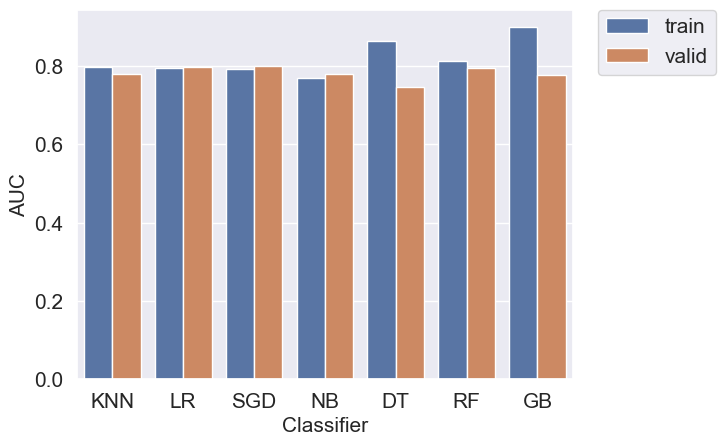

In [95]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

# learning Course

In [96]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [97]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

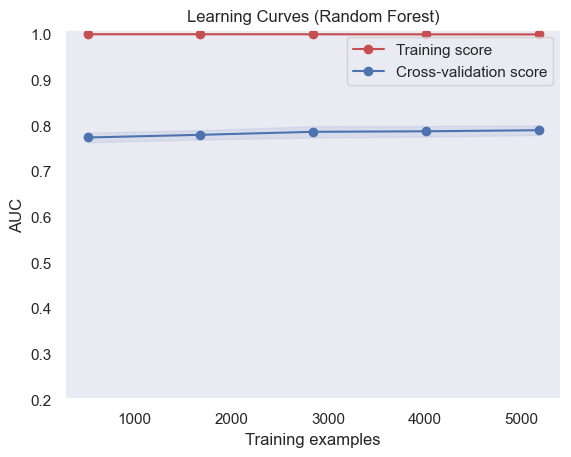

In [98]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()


High Variance:
- Add more samples
- Add regularization
- Reduce number of features
- Decrease model complexity
- Add better features
- Change model architecture

High Bias:
- Add new features
- Increase model complexity
- Reduce regularization
- Change model architecture

# Feature Importance

In [99]:
# LG

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [100]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [101]:
feature_importances

,importance
cons.price.idx,0.948431
euribor3m,0.487498
month_aug,0.215945
nr.employed,0.197676
month_mar,0.182496
...,...
month_jun,-0.129599
contact_telephone,-0.132556
month_may,-0.179712
pdays,-0.226318


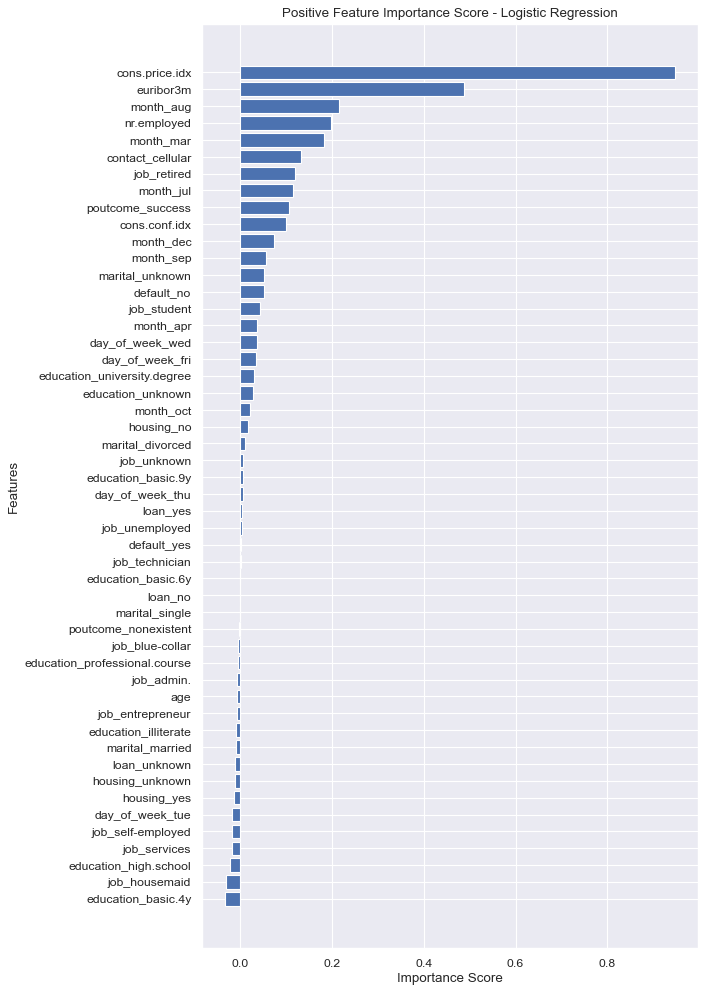

In [102]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)

# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

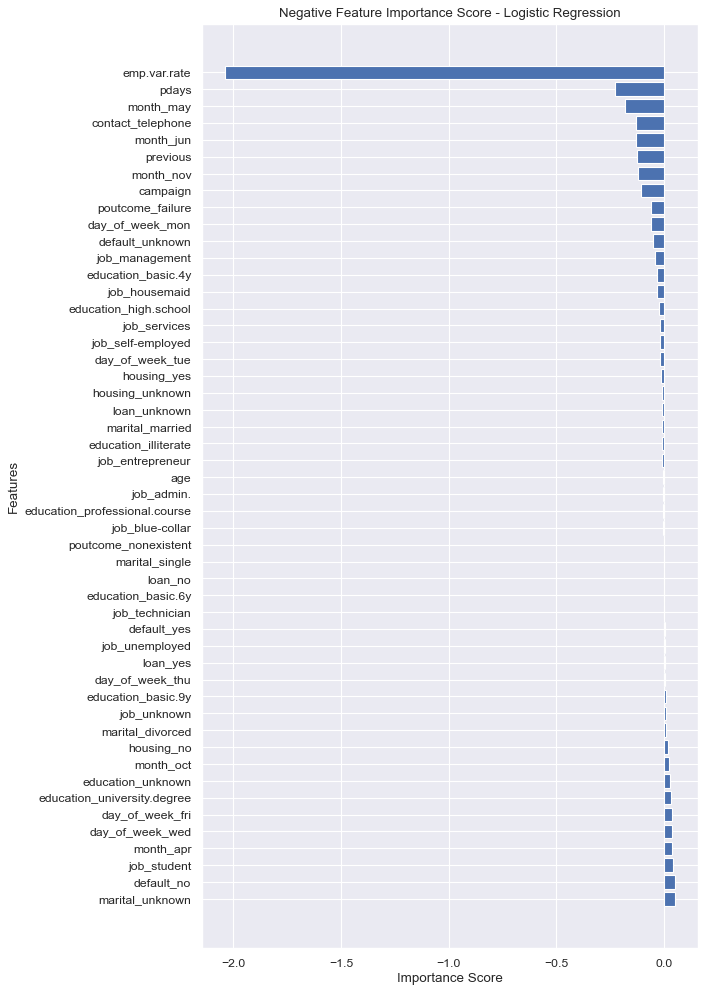

In [103]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [104]:
# RF

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [105]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.179492
euribor3m,0.178576
emp.var.rate,0.128020
cons.conf.idx,0.079699
poutcome_success,0.062927


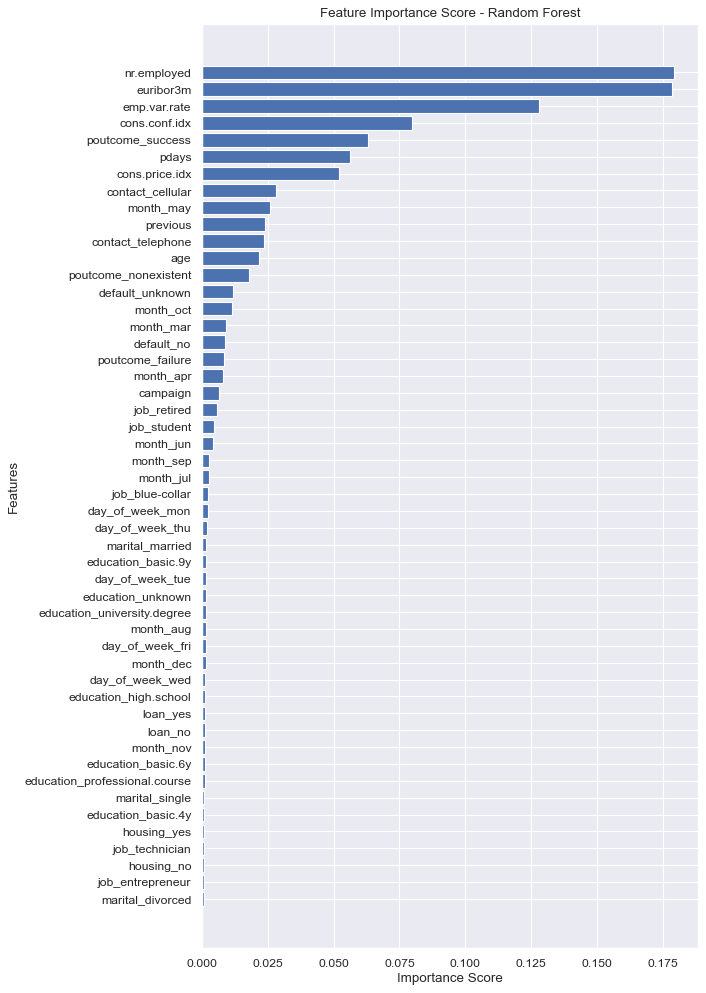

In [106]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

In [107]:
# GB

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [108]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.426433
cons.conf.idx,0.134227
euribor3m,0.101667
age,0.061061
campaign,0.029272


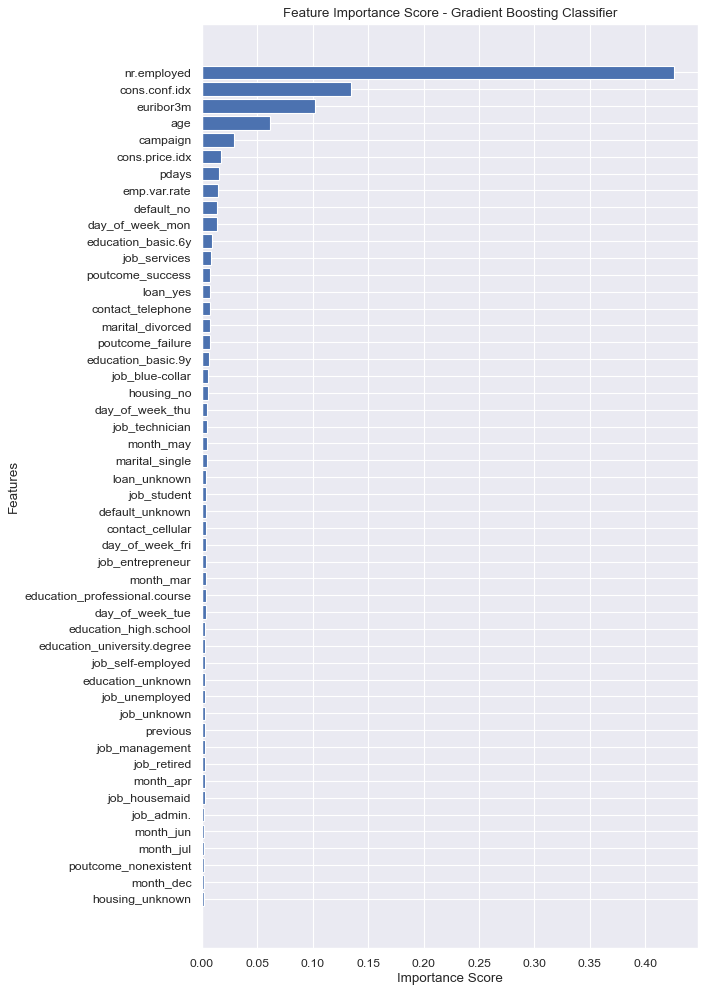

In [109]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

In [110]:
# DT

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [111]:
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.474196
cons.conf.idx,0.141049
euribor3m,0.061570
age,0.053487
campaign,0.032472


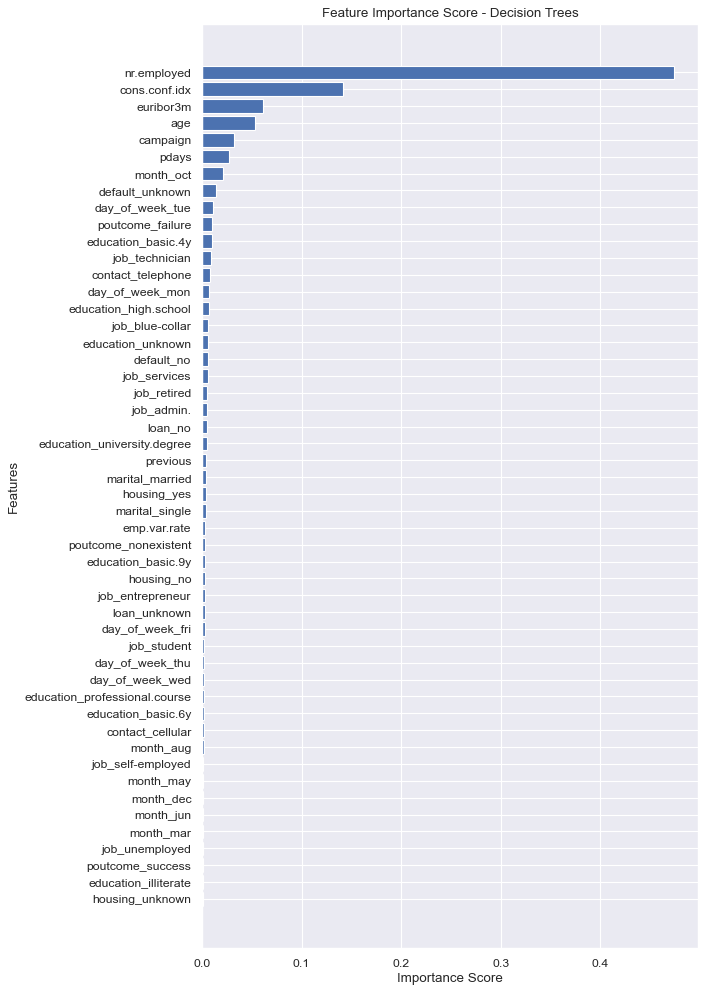

In [112]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision Trees')
plt.yticks(ylocs, feature_labels)
plt.show()

# Hyperpramater Tunning

In [113]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

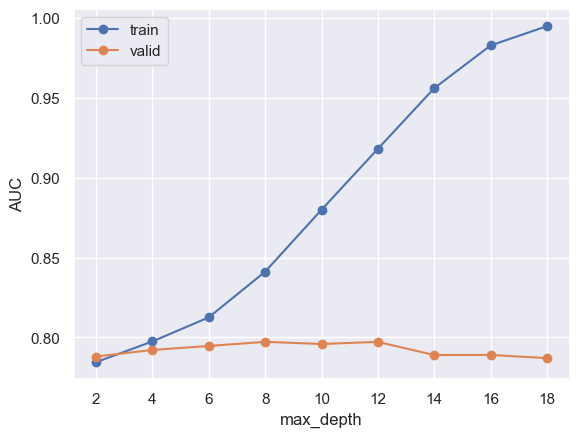

In [114]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [115]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [116]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)

# maximum number of features to use at each split
max_features = ['auto','sqrt']

# maximum depth of the tree
max_depth = range(2,20,2)

# minimum number of samples to split a node
min_samples_split = range(2,10,2)

# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [117]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [118]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [119]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
88.0436577796936


In [120]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

In [121]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.813
Validation AUC:0.795
Optimized Random Forest
Training AUC:0.842
Validation AUC:0.796


In [122]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [123]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

1.504779577255249


In [124]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 400, 'alpha': 0.01}

In [125]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.792
Validation AUC:0.800
Optimized sgdc
Training AUC:0.794
Validation AUC:0.793


In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [127]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

35.96554732322693


In [128]:
gbc_random.best_params_

{'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.1}

In [129]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.900
Validation AUC:0.777
Optimized gbc
Training AUC:0.817
Validation AUC:0.798


In [130]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [131]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.799965
1,SGD,optimized,0.793466
2,RF,baseline,0.794637
3,RF,optimized,0.796174
4,GB,baseline,0.776609
5,GB,optimized,0.798411


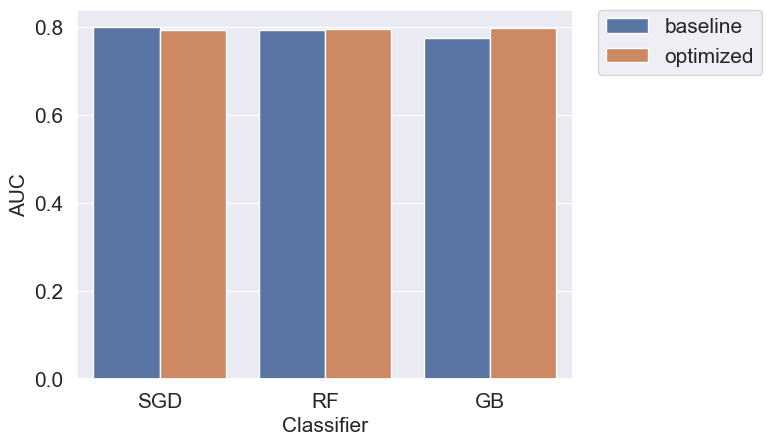

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [133]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [135]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))


In [136]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [137]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [138]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [139]:
thresh = .5

In [140]:

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.817
accuracy:0.754
recall:0.644
precision:0.826
specificity:0.864
prevalence:0.500
f1:0.724
 
Validation:
AUC:0.798
accuracy:0.755
recall:0.645
precision:0.826
specificity:0.864
prevalence:0.500
f1:0.724
 
Test:
AUC:0.795
accuracy:0.741
recall:0.620
precision:0.818
specificity:0.862
prevalence:0.500
f1:0.705
 


# ROC Curve

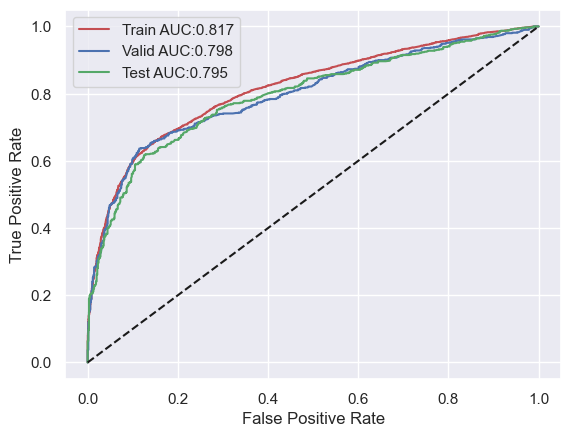

In [141]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Conclusion

Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier with optimized hyperparameters. The model's performance is 79.5%.

A precision of 0.82 divided by a prevalence of 0.50 gives us 1.6, which means that the machine learning model helps us 1.6 times better than randomly guessing. The model was able to catch 62% of customers that will subscribe to a term deposit.

We should focus on targeting customers with high cons.price.idx (consumer price index) and euribor3m (3 month indicator for paying off loans) as they are high importance features for the model and business.

Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.